In [1]:
# Set up a dataframe as follows such that each CATEGORY (colour) is a separate column


import pandas as pd 
  
# initialize list of lists 
data = [['group1', "email",  10,  5,  1], ['group1', "fax",  11,  10,  6], ['group1', "letter",  25,  19,  13],
        ['group2', "email", 6,  4,  2], ['group2', "fax",  12,  10,  8], ['group2', "letter",  22,  18,  10],
        ['group3', "email", 6,  4,  2], ['group3', "fax",  12,  10,  8], ['group3', "letter",  22,  18,  10]]
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['group', 'method', 'category1', 'category2', 'category3']) 

df

,group,method,category1,category2,category3
0,group1,email,10,5,1
1,group1,fax,11,10,6
2,group1,letter,25,19,13
3,group2,email,6,4,2
4,group2,fax,12,10,8
5,group2,letter,22,18,10
6,group3,email,6,4,2
7,group3,fax,12,10,8
8,group3,letter,22,18,10


## Set up group spacing along x axis

NB this assumes that all groups and methods repeat

In [2]:
import numpy as np

#count how many "groups" and how many "methods"
ngroups = df["group"].nunique()
nmethods = df["method"].nunique()

# create a number sequence with the number of spaces on x axis required
ind = np.arange(0,df["group"].count()+ df["group"].nunique()-1)

# create a sequence of the positions where no data will be plotted (ie. the gaps between categories)
index = np.arange(nmethods,len(ind),nmethods+1)

new_ind = np.delete(ind, index)

new_ind


array([ 0,  1,  2,  4,  5,  6,  8,  9, 10])

# create chart

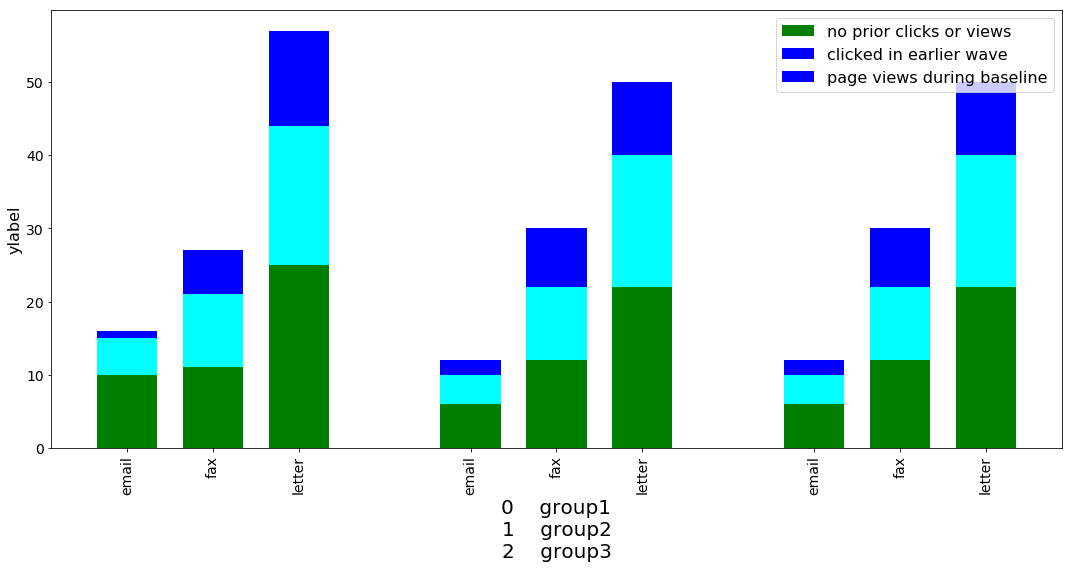

In [3]:


# set required details:
ylabel = "ylabel"
colors = ["green","cyan","blue"]


import matplotlib.pyplot as plt
from matplotlib import gridspec


fig = plt.subplots(figsize=(15,8))

#gs = gridspec.GridSpec(1, 2, width_ratios=[2, 3]) 

#ax0 = plt.subplot(gs[0])

width = 0.7       # the width of the bars

bottom = pd.DataFrame(0, index=np.arange(0, df.shape[0]), columns=np.arange(1))

for n in np.arange(1,len(df.columns)-1):
    bottom[n] = df[df.columns[n+1]] + bottom[n-1] 
    if n==1:
        p1 = plt.bar(new_ind, df[df.columns[n+1]], width, color=colors[n-1])
    else:
        p2 = plt.bar(new_ind, df[df.columns[n+1]], width, bottom=bottom[n-1], color=colors[n-1])
        c = p2[0]

plt.ylabel(ylabel, size=16)
plt.yticks(size=14)

plt.xticks(new_ind, df['method'], size=14,  rotation='vertical')
plt.xlabel(pd.Series(df['group'].unique()).to_string(), size=20)

plt.legend((p1[0], p2[0], p2[0]), ("no prior clicks or views","clicked in earlier wave","page views during baseline"),fontsize=16)

plt.tight_layout()
plt.show()
